# 1. Combined Cycle Power Plant Data Set
<p> The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant. 
</p>

###  (a) Downloaded the Combined Cycle Power Plantdata from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant.



In [164]:
import pandas as pd 
df=pd.read_excel('ccpp.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [165]:
df.shape


(9568, 5)

# (b) Exploring the data:

### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

->The number of rows are 9568 and columns are 5

->The rows represent the values of average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH), Exhaust Vacuum (V ) and electrical energy output (EP) collected from a combined cycle power plant over 6 years,when the power plant was set to work with full load  

->The columns AT,AP,RH,V,EP shows the values of each of these variable over the 6 years 



### ii. Making pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable.


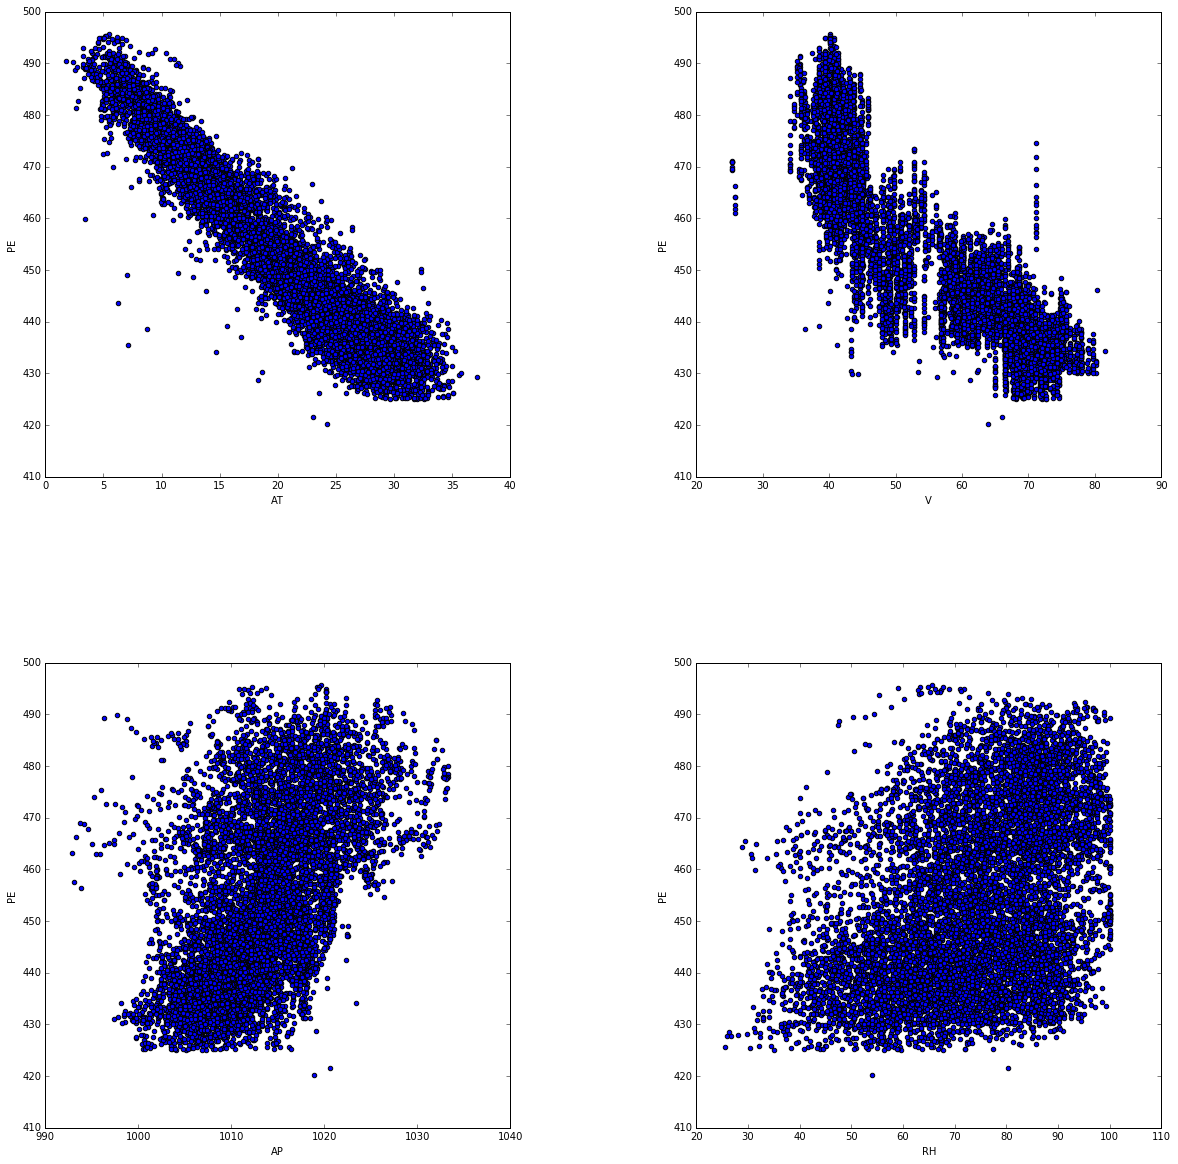

In [166]:
import matplotlib.pyplot as plt
%matplotlib inline 

labels=['AT','V','AP','RH']
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,5):
    plt.subplot(2, 2, i)
    plt.scatter(df[labels[i-1]],df.PE)
    plt.xlabel(labels[i-1])
    plt.ylabel('PE')
plt.show()

#### Findings :
-> In plot 1 of PE vs AT  ,the relationsip is linear ,negative, moderately strong and has potential outliers <br/>
->In plot 2 of PE vs V, the model is non-linear , negative, weak and has potential outliers <br/>
->In plot3 of PE vs AP, the realtionship is non-linear , positive , weak and has potential outliers<br/> 
->In plot 4 of PE vs RH, the relationship is non-linear , positive, very weak and has potential outliers<br/> 


### iii. Listing the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset


In [167]:
stats=df.describe()
stats_row1 = [stats.AT['75%']-stats.AT['25%'],stats.V['75%']-stats.V['25%'],stats.AP['75%']-stats.AP['25%'],stats.RH['75%']-stats.RH['25%'],stats.PE['75%']-stats.PE['25%']]
stats_row2= [stats.AT['max']-stats.AT['min'],stats.V['max']-stats.V['min'],stats.AP['max']-stats.AP['min'],stats.RH['max']-stats.RH['min'],stats.PE['max']-stats.PE['min']]
stats.loc['interqart_range']=stats_row1
stats.loc['range']= stats_row2

stats

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
interqart_range,12.210000,24.800000,8.160000,21.502500,28.680000
range,35.300000,56.200000,40.410000,74.600000,75.500000


## (c) For each predictor, fitting a simple linear regression model to predict the response. 


In [168]:
import statsmodels.api as sm
import seaborn as sns
#sns.set(style="white")
 
y_data = df.drop(df.columns[[0,1,2,3]], axis=1)
x_data_AT = df.drop(df.columns[[1,2,3,4]], axis=1)

### AT vs PE
### Findings :

->As we can see for AT and PE the slope is negative and so the PE decreases by ~ 2.17 times for every increase in the value of AT and the pvalue < 0.05, which tells that there is a negative relationship between the predictor and response variables .

-> As seen in the box plot there are no potential outliers .

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:44:00   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

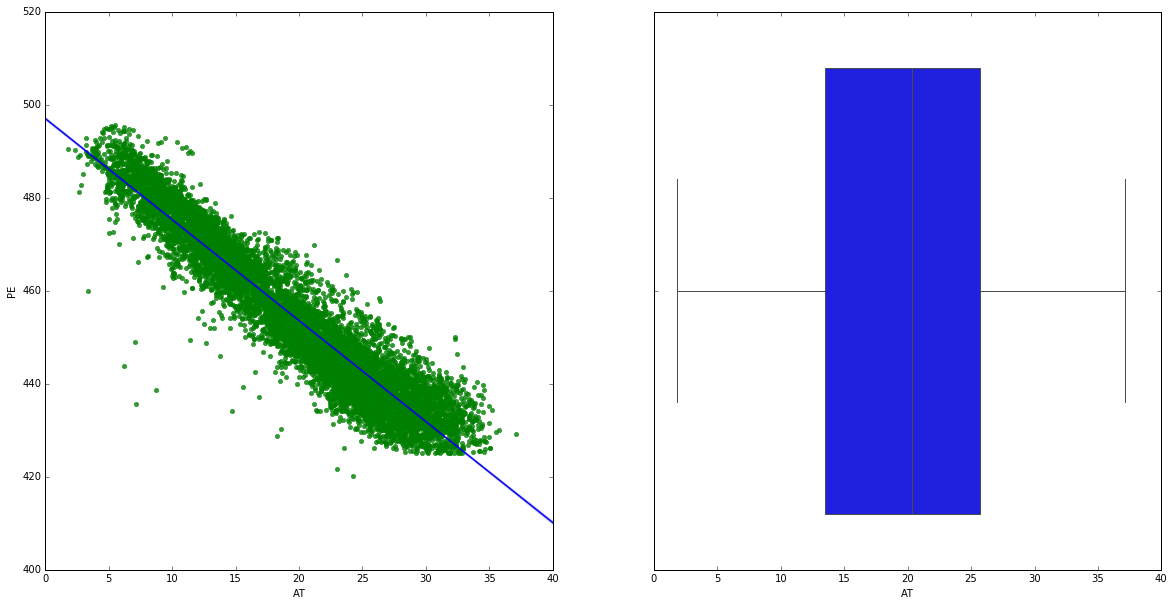

In [169]:

coef_uni=[]
stats_mod = sm.OLS(y_data,sm.add_constant(x_data_AT))
res = stats_mod.fit()
print(res.summary())
coef_uni.append(res.params[1])
print(type(coef_uni))
print (res.params[1])
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
ax = sns.regplot(x='AT', y='PE', data=df,scatter_kws={'color':'green'},line_kws={'label':'$y=%3.7s*x+%3.7s$'%(res.params[1], res.params[0])})
plt.subplot(1, 2, 2)
plt.xlabel('AT')
print sns.boxplot(x_data_AT)

### V vs PE
### Findings :
->As we can see for V and PE the slope is negative and so the PE decreases by ~ 1.16 times for every increase in the value of V and the pvalue < 0.05, which tells that there is a negative relationship between the predictor and response variables .

-> As seen in the box plot there are no potential outliers.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:04:14   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

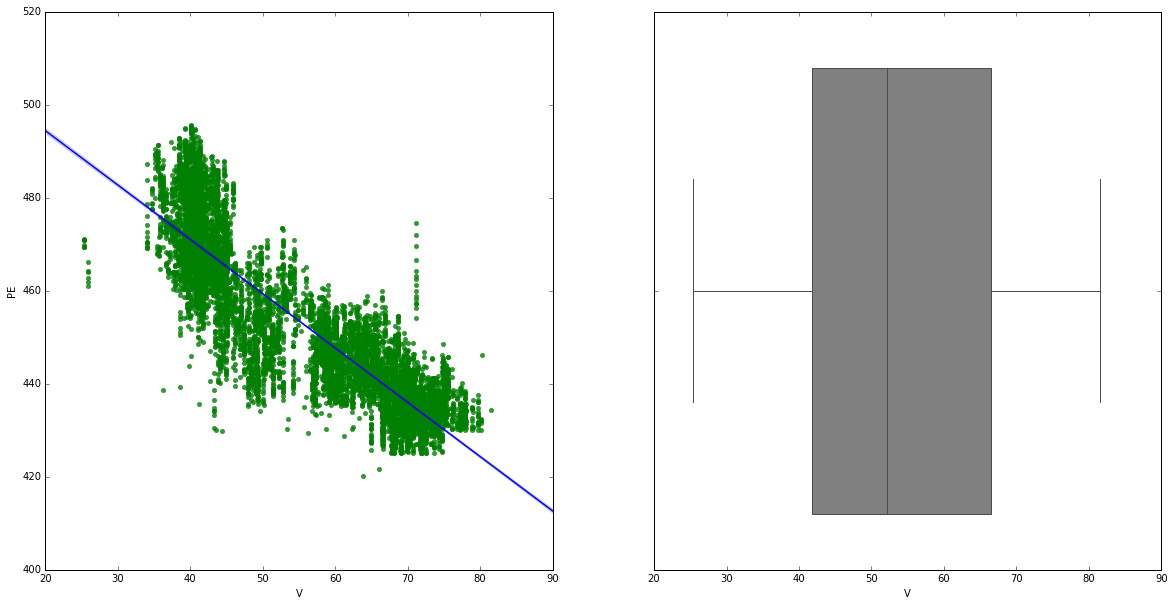

In [198]:
x_data_V = df.drop(df.columns[[0,2,3,4]], axis=1)
stats_mod = sm.OLS(y_data,sm.add_constant(x_data_V))
res = stats_mod.fit()
# Statsmodels gives R-like statistical output
print(res.summary())
coef_uni.append(res.params[1])
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax = sns.regplot(x='V', y='PE', data=df,scatter_kws={'color':'green'},line_kws={'label':'$y=%3.7s*x+%3.7s$'%(res.params[1], res.params[0])})
plt.subplot(1,2,2)
plt.xlabel('V')
print sns.boxplot(x_data_V,color='grey')

### AP vs PE

### Findings 
->As we can see for AP and PE the slope is positive and so the PE increases by ~ 1.48 times for every increase in the value of AP and the pvalue < 0.05, which tells that there is a positive relationship between the predictor and response variables .

-> As seen in the box plot there are potential outliers than can be removed to improve the model performance

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:44:03   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

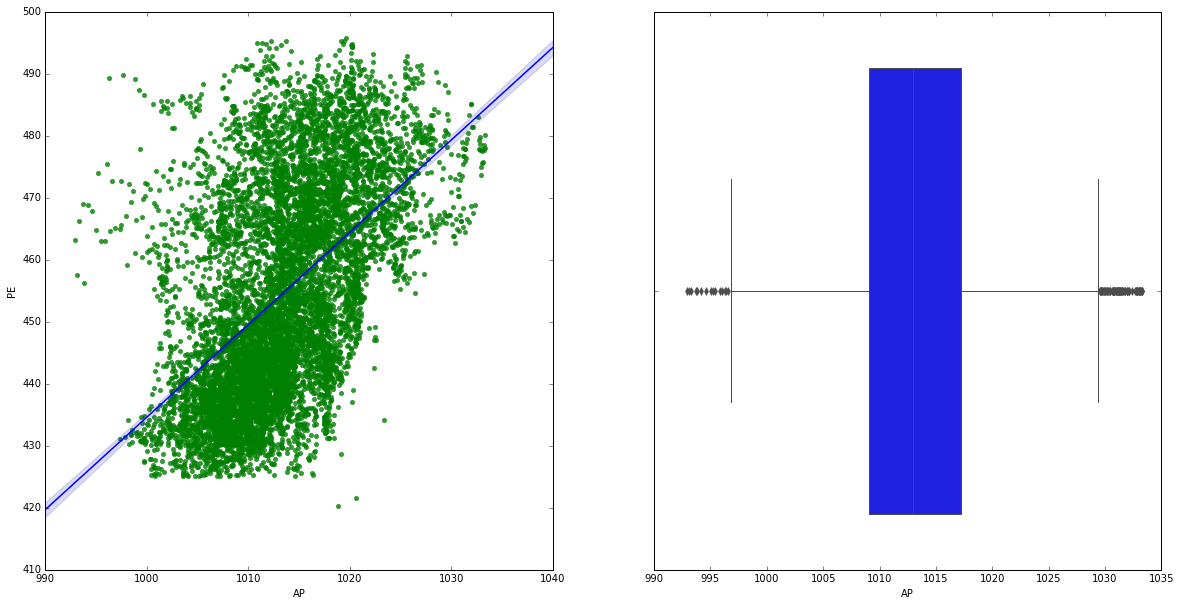

In [171]:
x_data_AP = df.drop(df.columns[[0,1,3,4]], axis=1)
stats_mod = sm.OLS(y_data, sm.add_constant(x_data_AP))
res = stats_mod.fit()
# Statsmodels gives R-like statistical output
print(res.summary())
coef_uni.append(res.params[1])
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax = sns.regplot(x='AP', y='PE', data=df,scatter_kws={'color':'green'},line_kws={'label':'$y=%3.7s*x+%3.7s$'%(res.params[1], res.params[0])})
plt.subplot(1,2,2)
plt.xlabel('AP')
print sns.boxplot(x_data_AP)

### RH vs PE

### Findings :
->As we can see for RH and PE the slope is positive and so the PE increases by ~ 0.45 times for every increase in the value of RH and the pvalue < 0.05, which tells that there is a positive relationship between the predictor and response variables .

-> As seen in the box plot there are potential outliers than can be removed to improve the model performance

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:44:04   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

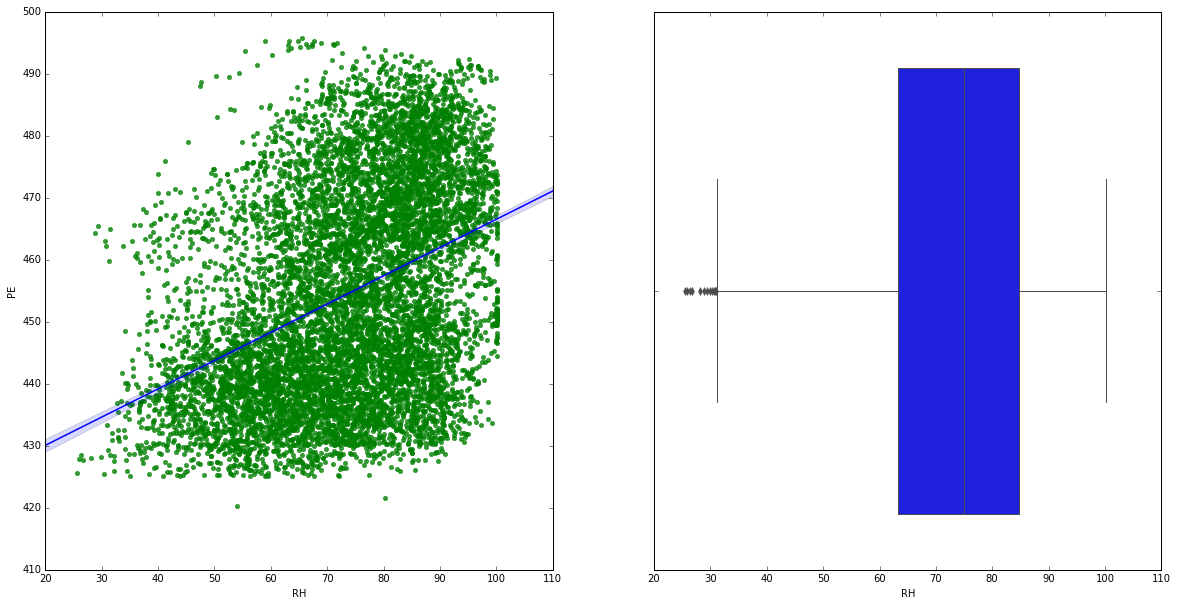

In [172]:
x_data_RH = df.drop(df.columns[[0,1,2,4]], axis=1)
stats_mod = sm.OLS(y_data, sm.add_constant(x_data_RH))
res = stats_mod.fit()
# Statsmodels gives R-like statistical output
print(res.summary())
coef_uni.append(res.params[1])
cd=coef_uni
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax = sns.regplot(x='RH', y='PE', data=df,scatter_kws={'color':'green'},line_kws={'label':'$y=%3.7s*x+%3.7s$'%(res.params[1], res.params[0])})
plt.subplot(1,2,2)
plt.xlabel('RH')
print sns.boxplot(x_data_RH)

## d) Fitting a multiple regression model to predict the response using all of the predictors. 

The predictors  for which we can reject the null hypothesis H0 : βj = 0 :

-> All the predictors have a P-value < 0.05, so we can reject the null hypothesis for all the predictors 

-> The predictors AT, V, RH have a negative relationship with the response variable PE and AP has a positive relationship with PE 

In [173]:
df.head()
x_data = df.drop(df.columns[[4]], axis=1)

In [174]:
stats_mod = sm.OLS(y_data, sm.add_constant(x_data))
res = stats_mod.fit()
#print coeff_multi
print(res.summary()) 
coeff_multi=[-1.977513,-0.233916, 0.062083,-0.158054]
#sns.regplot(x=df.columns[0,1,2,3], y='PE', data=df,scatter=False)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:44:06   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

## e) Results from 1c compared to results from 1d. Created a plotdisplaying the univariate regression coefficients from 1c on the x-axis, and the  multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis

[-2.171319958517798, -1.1681351265557098, 1.489871673399116, 0.45565010226298147] [-1.977513, -0.233916, 0.062083, -0.158054]


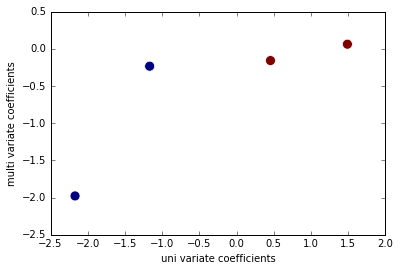

In [175]:
print cd,coeff_multi
ax = sns.scatterplot(x=cd, y=coeff_multi,s=100)
ax.set_xlabel('uni variate coefficients')
ax.set_ylabel('multi variate coefficients')

## (f) Is there evidence of nonlinear association between any of the predictors and theresponse? To answer this question, for each predictor X, fit a model of the form

## $Y = β_{0} + β_{1}X + β_{2}X^{^{2}} + β_{3}X^{3} +\epsilon$

#### Findings :
-> Yes, there is a nonlinear association for the features AT,AP and RH with PE in the model of the above form.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:44:06   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248      0.0

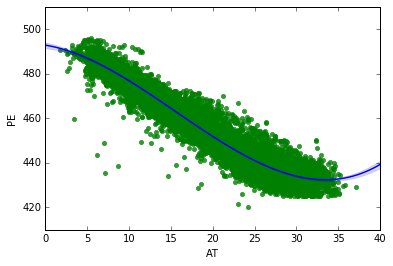

In [176]:
import statsmodels.formula.api as smf
stats_mod = smf.ols('PE ~ AT + I(AT**2) + I(AT**3)', data=df)
res = stats_mod.fit()
print(res.summary())
ax = sns.regplot(x='AT', y='PE', data=df,order=3,scatter_kws={'color':'green'},line_kws={'label':'$y=%3.7s*x+%3.7s$'%(res.params[1], res.params[0])})

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:44:08   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    554.1468      9.151     60.557      0.0

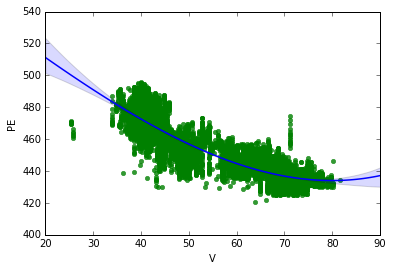

In [177]:
stats_mod = smf.ols('PE ~ V + I(V**2) + I(V**3)', data=df)
res = stats_mod.fit()
print(res.summary())
ax = sns.regplot(x='V', y='PE', data=df,order=3,scatter_kws={'color':'green'},line_kws={'label':'$y=%3.7s*x+%3.7s$'%(res.params[1], res.params[0])})

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:44:10   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.0

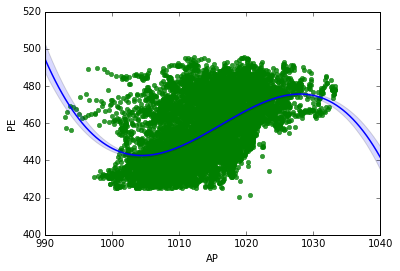

In [178]:
stats_mod = smf.ols('PE ~ AP + I(AP**2) + I(AP**3)', data=df)
res = stats_mod.fit()
print(res.summary())
ax = sns.regplot(x='AP', y='PE', data=df,order=3,scatter_kws={'color':'green'},line_kws={'label':'$y=%3.7s*x+%3.7s$'%(res.params[1], res.params[0])})

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:44:12   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    468.4135     10.545     44.422      0.0

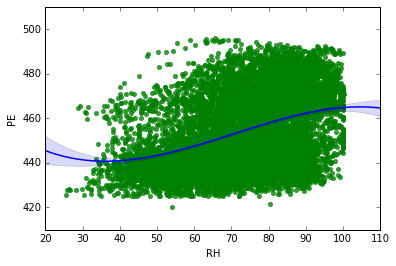

In [179]:
stats_mod = smf.ols('PE ~ RH + I(RH**2) + I(RH**3)', data=df)
res = stats_mod.fit()
print(res.summary())
ax = sns.regplot(x='RH', y='PE', data=df,order=3,scatter_kws={'color':'green'},line_kws={'label':'$y=%3.7s*x+%3.7s$'%(res.params[1], res.params[0])})

## (g) Is there evidence of association of interactions of predictors with the response? 
To answer this question, I am running a full linear regression model with all pairwise interaction terms and stating whether any interaction terms are statistically significant.

-> Yes, there are valid interactions between terms like AT and V , AT and RH , V and AP , AP and RH.

-> The following terms are not statistically significant - AT and AP , V and RH as the p-values are > 0.05 as observed below .


In [180]:
import patsy as ps
pe,x_cov = ps.dmatrices('PE ~ AT + V + AP + RH + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH ', df)
x_cov.shape


(9568L, 11L)

In [181]:
stats_mod = sm.OLS(pe,sm.add_constant(x_cov))
res = stats_mod.fit()
par = res.params
print(res.summary(xname=['const','AT','V','AP','RH','AT:V','AT:AP','AT:RH','V:AP','V:RH','AP:RH']))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:44:14   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

## (h) To improve model using possible interaction terms or nonlinear associations between the predictors and responses, Trainning the regression model on a randomly selected 70% subset of the data with all predictors. Also, running a regression model involving all possible interaction terms and quadratic nonlinearities, and removing insignificant variables using p-values (be careful about interaction terms). Testing both models on the remaining points and reporting train and test MSEs.

From the simple linear regression we can see that the test MSE~20 and train MSE~21
which is higher than model with interactions ans test MSE~17 and Train MSE~18

we can infer from this that interaction and quadratic terms improve the model

In [182]:
from patsy import ModelDesc
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.30, random_state=40)
data_train=x_train.join(y_train)
data_test=x_test.join(y_test)

stats_mod_train1 =smf.ols( ModelDesc.from_formula("PE ~ AT + V + AP + RH "), data=data_train )
res1 = stats_mod_train1.fit()
print ('PE = AT + V + AP + RH')
print ("train MSE: {}".format(res1.mse_resid))
#stats_mod_test1 =smf.ols( ModelDesc.from_formula("PE ~ AT + V + AP + RH "), data=data_test )
#res1 = stats_mod_test1.fit()
y_pred=res1.predict(x_test)
print ("test MSE: {}".format(mean_squared_error(y_test,y_pred)))

#performing backward elimination on all the quadratic non linearlities and interactions 
stats_mod_train = smf.ols( ModelDesc.from_formula("PE ~ AT + V + AP + RH + I(AT**2) + I(V**2) + I(AP**2) + I(RH**2)+ I(AT*V) + I(V*RH) + I(AT*AP) + I(AT*RH) + I(V*AP) + I(AP*RH)"), data=data_train)
res = stats_mod_train.fit()
print res.summary()

PE = AT + V + AP + RH
train MSE: 20.4380223904
test MSE: 21.6058824052
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7291.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:44:14   Log-Likelihood:                -19147.
No. Observations:                6697   AIC:                         3.832e+04
Df Residuals:                    6682   BIC:                         3.843e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [183]:
#(V*RH) has a highest p-value  0.941 which is greater than 0.05
stats_mod_train = smf.ols( ModelDesc.from_formula("PE ~ AT + V + AP + RH + I(AT**2) + I(V**2)  + I(AP**2)  + I(RH**2) + I(AT*V) + I(AT*AP)+I(AT*RH) + I(V*AP) + I(AP*RH)"), data=data_train)
res=stats_mod_train.fit()
print res.summary()


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7853.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:44:14   Log-Likelihood:                -19147.
No. Observations:                6697   AIC:                         3.832e+04
Df Residuals:                    6683   BIC:                         3.842e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5948.8152   1430.150     -4.160      0.0

In [184]:
#(V ** 2)  has ap-value of 0.290  which is greater than 0.05

stats_mod_train = smf.ols( ModelDesc.from_formula("PE ~ AT + V + AP + RH + I(AT**2)  + I(AP**2)  + I(RH**2) + (AT*V) + (AT*AP)+ (AT*RH) + (V*AP) + (AP*RH) "), data=data_train)
res=stats_mod_train.fit()
print res.summary()


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     8508.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:44:14   Log-Likelihood:                -19148.
No. Observations:                6697   AIC:                         3.832e+04
Df Residuals:                    6684   BIC:                         3.841e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5985.6638   1429.738     -4.187      0.0

In [185]:
#AT * AP has the highest p-value dof 0.133 which is greater than 0.05
#removing AT*AP 
stats_mod_train = smf.ols( ModelDesc.from_formula("PE ~ AT + V + AP + RH + I(AT**2)  + I(AP**2)  + I(RH**2) + (AT*V) + (AT*RH) + (V*AP) + (AP*RH)"), data=data_train)
res=stats_mod_train.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     9279.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:44:14   Log-Likelihood:                -19149.
No. Observations:                6697   AIC:                         3.832e+04
Df Residuals:                    6685   BIC:                         3.840e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7071.3797   1233.323     -5.734      0.0

In [186]:
# this is the optimal model 
y_pred_interac=res.predict(x_test)
print ('PE = AT + V + AP + RH + AT^2  + AP^2  + RH^2  + AT*V + AT*RH + V*AP + AP*RH')
print ("train MSE: {}".format(res.mse_resid))
print ("test MSE: {}".format(mean_squared_error(y_test,y_pred_interac)))

PE = AT + V + AP + RH + AT^2  + AP^2  + RH^2  + AT*V + AT*RH + V*AP + AP*RH
train MSE: 17.8593777479
test MSE: 18.8227343904


## (i) KNN Regression:

### i. Performing k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1, 2, . . . , 100}

In [187]:
from sklearn.neighbors import KNeighborsRegressor

### KNN with normalized data

In [188]:
train_error={}
test_error={}
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
np_scale = scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scale)
#print df_normalized
y_data_norm = df_normalized.drop(df_normalized.columns[[0,1,2,3]], axis=1)
x_data_norm = df_normalized.drop(df_normalized.columns[[4]], axis=1)
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_data_norm,y_data_norm, test_size=0.30, random_state=42)
#print(x_test_norm) 

In [189]:
for k7 in range(1,101,1):
    neigh = KNeighborsRegressor(n_neighbors=k7)
    neigh.fit(x_train_norm,y_train_norm)
    train_error[k7]=1-neigh.score(x_train_norm,y_train_norm)
    test_error[k7]=1-neigh.score(x_test_norm,y_test_norm)
tr_index=min(train_error,key=train_error.get)
print("optimal k : {} , error rate:{}".format(tr_index,train_error[tr_index]))
ts_index=min(test_error,key=test_error.get)
print("optimal k : {} , error rate:{}".format(ts_index,test_error[ts_index]))

neigh_fin = KNeighborsRegressor(n_neighbors=ts_index)
neigh_fin.fit(x_train_norm,y_train_norm)
y_pred_norm = neigh_fin.predict(x_test_norm)
test_mse1=mean_squared_error(y_pred_norm,y_test_norm)
print("test mse : {}".format(test_mse1))

optimal k : 1 , error rate:0.0
optimal k : 4 , error rate:0.0489448456299
test mse : 0.0025171972237


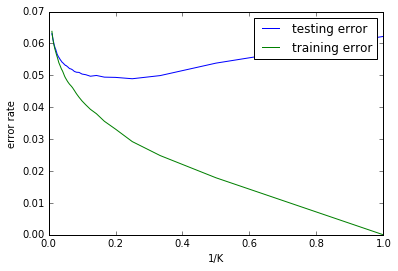

In [190]:
tes_items_x,tes_items_y=zip(*sorted(test_error.items()))
tr_items_x,tr_items_y=zip(*sorted(train_error.items()))
invert= [ 1.00/chi for chi in range(1,101,1)]
#print invert
plt.xlabel("1/K")
plt.ylabel("error rate")
a = plt.plot(invert,tes_items_y,label= 'testing error ')
b = plt.plot(invert,tr_items_y,label='training error')
plt.legend()


### KNN with raw data 

In [191]:
train_error3={}
test_error3={}
for k10 in range(1,101,1):
    #print k10
    neigh3 = KNeighborsRegressor(n_neighbors=k10)
    neigh3.fit(x_train,y_train)
    train_error3[k10]=1-neigh3.score(x_train,y_train)
    test_error3[k10]=1-neigh3.score(x_test,y_test)
#print train_error3
tr_index3=min(train_error3,key=train_error3.get)
print("optimal k : {} , error rate:{}".format(tr_index3,train_error3[tr_index3]))
ts_index3=min(test_error3,key=test_error3.get)
print("optimal k : {} , error rate:{}".format(ts_index3,test_error3[ts_index3]))

neigh_fin3 = KNeighborsRegressor(n_neighbors=ts_index3)
neigh_fin3.fit(x_train,y_train)
y_pred = neigh_fin3.predict(x_test)
test_mse=mean_squared_error(y_pred,y_test)
print("test MSE : {} ".format(test_mse))

optimal k : 1 , error rate:0.0
optimal k : 6 , error rate:0.0569403663265
test MSE : 16.7390659594 


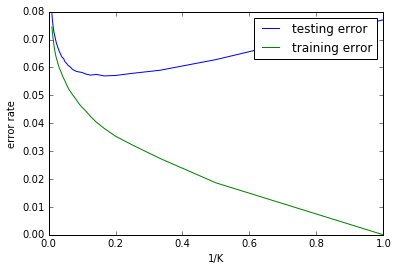

In [192]:
ts_items_x,ts_items_y=zip(*sorted(test_error3.items()))
train_items_x,train_items_y=zip(*sorted(train_error3.items()))
invert_k= [ 1.00/chi for chi in range(1,101,1)]
a = plt.plot(invert_k,ts_items_y,label= 'testing error ')
b = plt.plot(invert_k,train_items_y,label='training error')
plt.legend()
plt.xlabel("1/K")
plt.ylabel("error rate")

## (j) Comparing the results of KNN Regression with linear regression and  analysis for the same .

### 1. simple linear regression 
#### PE = AT + V + AP + RH

train MSE: 20.4380223904<br/>
test MSE: 21.6058824052<br/>

### 2. Linear Regression with significant interactions and quadratic non linearities 

#### PE = AT + V + AP + RH + AT^2  + AP^2  + RH^2  + AT*V + AT*RH + V*AP + AP*RH<br/>
train MSE: 17.8593777479<br/>
test MSE: 18.8227343904<br/>

### 3. KNN with normalized data

test mse : 0.0025171972237<br/>

### 4. KNN with raw data

test MSE : 16.7390659594 <br/>

->we can infer that KNN regressor is more efficient as it gives the least test MSE among all the other regression models 